In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Set dataset path
dataset_path = "dataset/"  # Ensure dataset folder exists

# Image parameters
img_width, img_height = 128, 128
batch_size = 32
num_classes = 2  # Random, Encrypted


In [3]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,   # Normalize pixel values
    rotation_range=10,  # Slight rotation
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Load Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

Found 1601 images belonging to 2 classes.


In [4]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)


Found 400 images belonging to 2 classes.


In [6]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train Model
epochs = 15
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Save Model
model.save("image_classifier.h5")

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.4924 - loss: 0.7005 

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 36s 664ms/step - accuracy: 0.4926 - loss: 0.7005 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 339ms/step - accuracy: 0.4832 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.5010 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.5142 - loss: 0.6931 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 316ms/step - accuracy: 0.5050 - loss: 0.6929 - val_accuracy: 0.5025 - val_loss: 0.6931
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 318ms/step - accuracy: 0.5051 - loss: 0.6933 - val_accuracy: 0.5450 - val_loss: 0.6931
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.4858 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 336ms/step - accuracy: 0.4949 - loss: 0.6934 - val_accuracy: 0.500

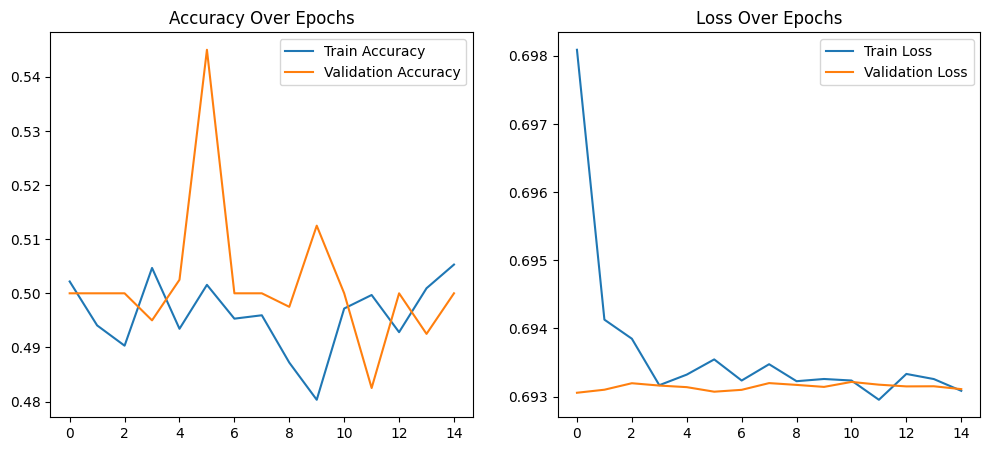

In [7]:
# Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


In [16]:

# Load and Predict on New Image
def predict_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch
    prediction = model.predict(img_array)
    class_label = "Encrypted" if prediction[0][0] > 0.5 else "Random"
    return class_label

# Example Usage
test_image_path = r"C:\Users\adars\OneDrive\Pictures\Screenshots\Screenshot 2025-02-03 212348.png"  # Provide test image path
model = keras.models.load_model("image_classifier.h5")
result = predict_image(test_image_path, model)
print(f"Predicted Class: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted Class: Encrypted
